# Credit Card Fraud Detection Dataset

This dataset contains credit card transactions made by European cardholders in September 2013. It includes data from two days, with a total of 284,807 transactions, out of which 492 are frauds. The dataset is highly imbalanced, as the positive class (frauds) accounts for just 0.172% of all transactions.

The dataset only contains numerical features, which are the result of a PCA (Principal Component Analysis) transformation. The features V1, V2, … V28 are the principal components derived from PCA. The non-transformed features are:

- **Time**: The time elapsed (in seconds) between each transaction and the first transaction in the dataset.
- **Amount**: The transaction amount. This feature can be used for example-dependent cost-sensitive learning.
- **Class**: The response variable, which takes a value of 1 if the transaction is fraudulent and 0 if it is not.

### Dataset Source
This dataset was collected and analyzed during a research collaboration between Worldline and the Machine Learning Group (mlg.ulb.ac.be) of Université Libre de Bruxelles (ULB) on big data mining and fraud detection. For more details on related projects, visit [BruFence](http://mlg.ulb.ac.be/BruFence) and [ARTML](http://mlg.ulb.ac.be/ARTML).

You can find the dataset on [OpenML](https://www.openml.org/d/1597).

### Citation
If you use this dataset, please cite:
> Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson, and Gianluca Bontempi. "Calibrating Probability with Undersampling for Unbalanced Classification." Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015.


In [2]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/carloseganacastanon/Desktop/Portfolio/Proyectos/Frad_Detection/archive/archive/creditcard.csv')

# Display the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [3]:
# Check for missing values in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

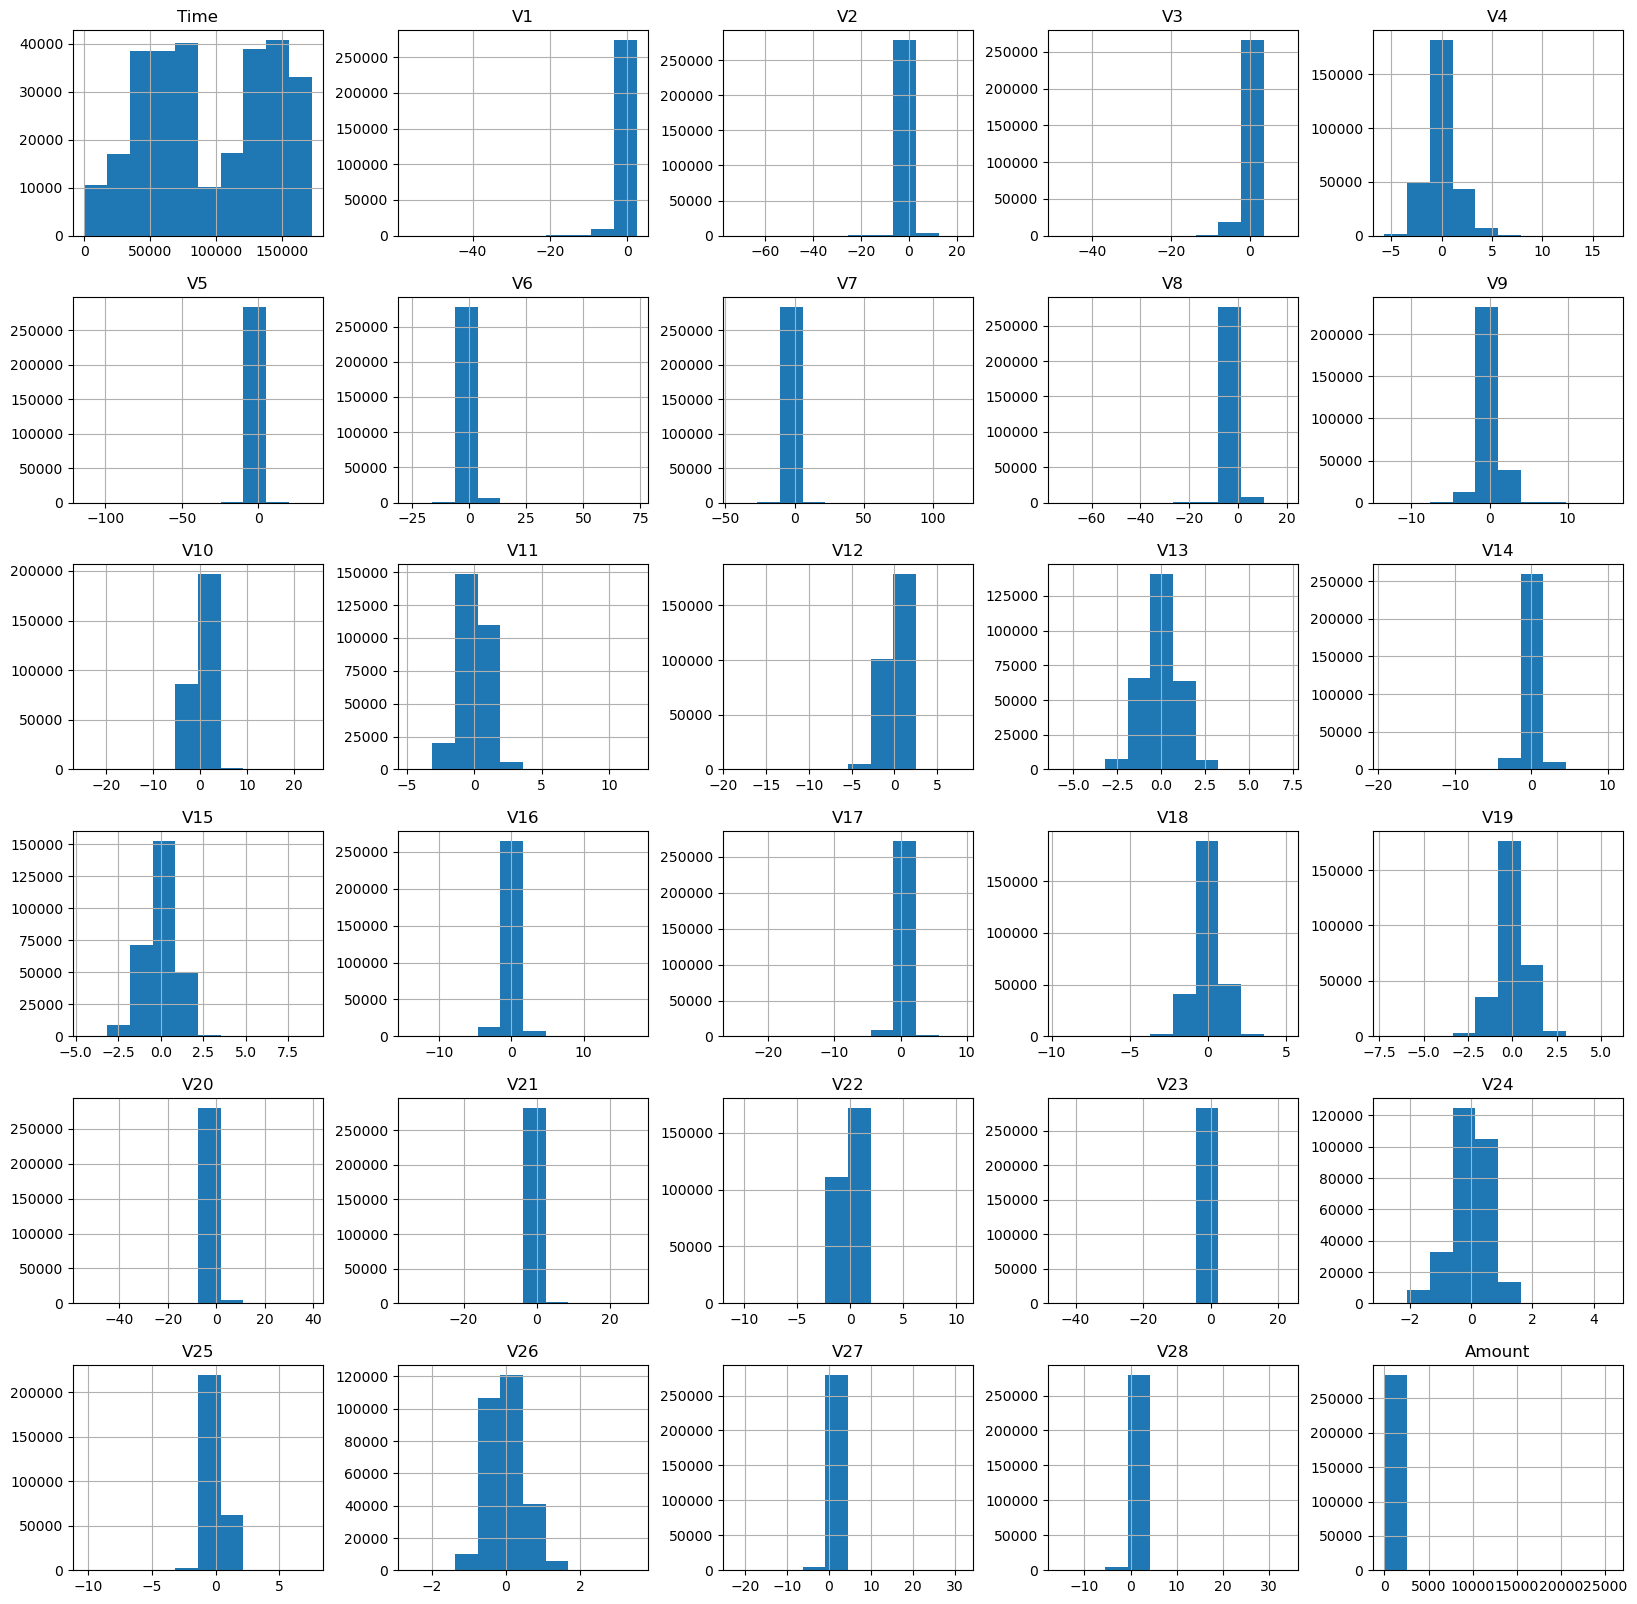

In [4]:
# Plot histograms of the dataset features to understand the distribution
df.hist(figsize=(20,20))
plt.show()


In [5]:
# Drop the 'Time' column as it is not necessary for the analysis
df = df.drop(['Time'], axis=1)


In [6]:
# Check unique values in the 'Class' column (fraudulent transactions)
print(df['Class'].unique())

# Display the count of each class (0 for non-fraud, 1 for fraud)
df['Class'].value_counts()

# Map the 'Class' values from '0' and '1' to False and True
df['Class'] = df['Class'].map({"'0'": False, "'1'": True})

# Verify the mapping result
print(df['Class'].value_counts())

# Show the first row to confirm changes
df.head(1)


["'0'" "'1'"]
Class
False    284315
True        492
Name: count, dtype: int64


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False


In [7]:
# Define the feature matrix (X) and target vector (y)
X = df.drop(columns=['Class'])
y = df['Class']


In [8]:
# Import necessary libraries for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score
from imblearn.under_sampling import RandomUnderSampler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform random undersampling to balance the classes
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced')
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate and display accuracy score
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Get the predicted probabilities for ROC-AUC and Average Precision
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("Average Precision:", average_precision_score(y_test, y_pred_proba))


Confusion Matrix:
 [[55558  1306]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.98      0.99     56864
        True       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Accuracy: 0.976931989747551
ROC-AUC: 0.9807402086467676
Average Precision: 0.7604684528860676


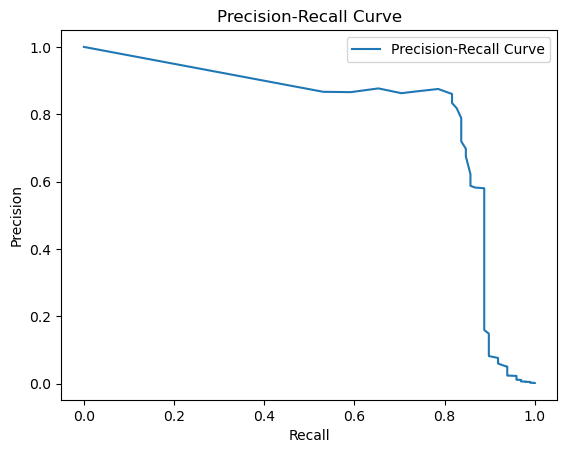

In [9]:
# Import necessary libraries
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the Precision-Recall Curve
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [10]:
# Import SMOTE to apply oversampling
from imblearn.over_sampling import SMOTE

# Split the data again for SMOTE application
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)  # SMOTE
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier again
model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate and display accuracy score
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Get the predicted probabilities for ROC-AUC and Average Precision
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("Average Precision:", average_precision_score(y_test, y_pred_proba))


Confusion Matrix:
 [[56853    11]
 [   15    83]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     56864
        True       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy: 0.9995435553526912
ROC-AUC: 0.9799875176575976
Average Precision: 0.8873857339284432


In [12]:
# Import cross_val_score for cross-validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data and calculate F1 score
scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='f1')
print("F1-score in cross-validation:", scores.mean())


F1-score in cross-validation: 0.9998857032714346


In [14]:
# Perform cross-validation on the final model
scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='f1')
print("F1-score in cross-validation:", scores.mean())

# Train the final model with specified hyperparameters
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate and display accuracy score
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Get the predicted probabilities for ROC-AUC and Average Precision
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("Average Precision:", average_precision_score(y_test, y_pred_proba))


F1-score in cross-validation: 0.9998879011943863
Confusion Matrix:
 [[56786    78]
 [   11    87]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     56864
        True       0.53      0.89      0.66        98

    accuracy                           1.00     56962
   macro avg       0.76      0.94      0.83     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy: 0.9984375548611355
ROC-AUC: 0.9887258751277663
Average Precision: 0.8375466689026388


In [11]:
# Import GridSearchCV to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_res, y_train_res)

# Get the best model
best_model = grid_search.best_estimator_


/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warning

In [13]:
# Use the best model's parameters for final training
model = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate and display accuracy score
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Get the predicted probabilities for ROC-AUC and Average Precision
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("Average Precision:", average_precision_score(y_test, y_pred_proba))


Confusion Matrix:
 [[56853    11]
 [   14    84]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     56864
        True       0.88      0.86      0.87        98

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy: 0.9995611109160493
ROC-AUC: 0.9842755862896649
Average Precision: 0.8885181820926709


In [ ]:
import joblib

# Saving the model
joblib.dump(model, 'fraud_detection_model.pkl')

print("Model Successfully Saved")


In [22]:
# Loading the model
loaded_model = joblib.load('fraud_detection_model.pkl')
